<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/dynamic_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run the code to create the gif of the world map:

From our Github repository qmii_group_rep, download the all the Word_Map. files and the fa_df.csv file.
Make sure to save them under the '*content*' folder on the left of the colab sheet.
All the files are required for the code tho run.

In [1]:
#importing and installing libraries to work with

import pandas as pd
!pip install git+git://github.com/geopandas/geopandas.git
import geopandas as gpd
import PIL
import pylab
import numpy as math
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#importing and installing more libraries that we'll need at a later stage

!pip install mapclassify --quiet
import mapclassify.classifiers as classifiers
from mapclassify import __version__ as mc_version

In [14]:
#reindexing the food availibility data set and unstacking it.

data_path = '/content/fa_df.csv'
fa_df = pd.read_csv(data_path)
fa_df

,Country,Year,Food Availibility per capita (kg/cap/year)
0,Algeria,1980,206.507152
1,Algeria,1981,197.960152
2,Algeria,1982,196.535700
3,Algeria,1983,196.798051
4,Algeria,1984,191.743128
...,...,...,...
2355,Peru,2009,189.090475
2356,Peru,2010,191.126840
2357,Peru,2011,193.288913
2358,Peru,2012,198.678775


In [ ]:
fa_df.set_index(['Country', 'Year'], inplace = True)
df2 = fa_df.unstack()
df2.sort_values(by = 'Country', inplace = True)
df2.to_csv(r'Sorted.csv', index = True)
data = df2
data

In [9]:
#uploading the world map.

world_map = gpd.read_file(r'/content/World_Map.shp')

In [10]:
#Using a for loop, iterate through the names of the countries in our food availibility data set and see, using an if statement, which match with the World data set data and which don't. 

for index, row in data.iterrows():
  if index not in world_map['NAME'].to_list():
    print(index)
  else:
    pass

CAR
Céte d'Ivoire
DomRep
Laos
Moldova
North Korea
Tanzania
Vietnam


In [11]:
#replace the names of the countries that don't match.

world_map.replace('Central African Republic', 'CAR', inplace = True)
world_map.replace('Dominican Republic', 'DomRep', inplace = True)
world_map.replace("Lao People's Democratic Republic", 'Laos', inplace = True)
world_map.replace('Republic of Moldova', 'Moldova', inplace = True)
world_map.replace("Korea, Democratic People's Republic of", 'North Korea', inplace = True)
world_map.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world_map.replace('Viet Nam', 'Vietnam', inplace = True)
world_map.replace("Cote d'Ivoire", "Céte d'Ivoire", inplace = True)

In [12]:
#check again, if the outcome is void, then all the names correspond to each other.

for index, row in data.iterrows():
  if index not in world_map['NAME'].to_list():
    print(index)
  else:
    pass

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:624: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:624: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/

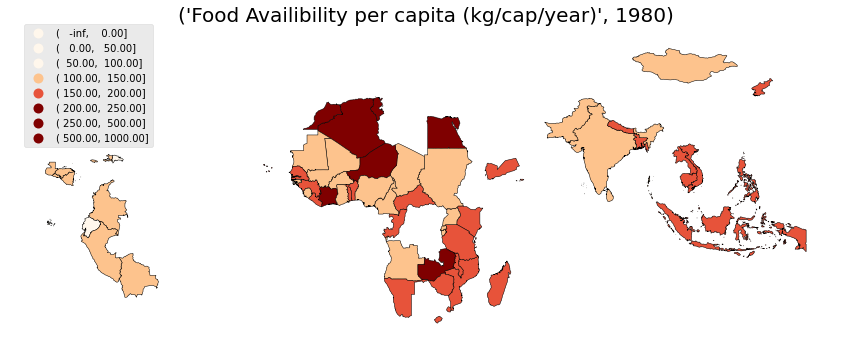

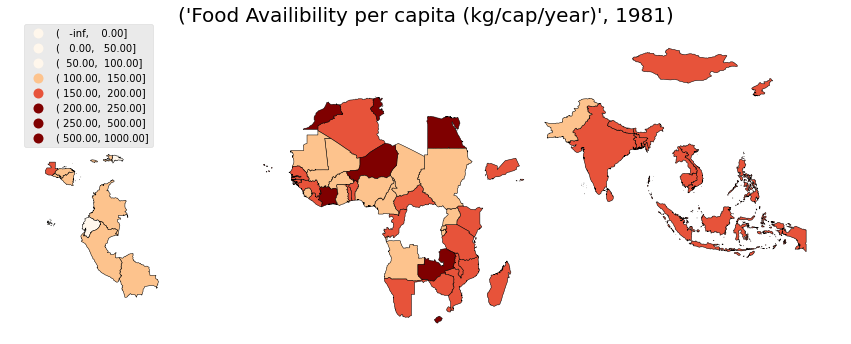

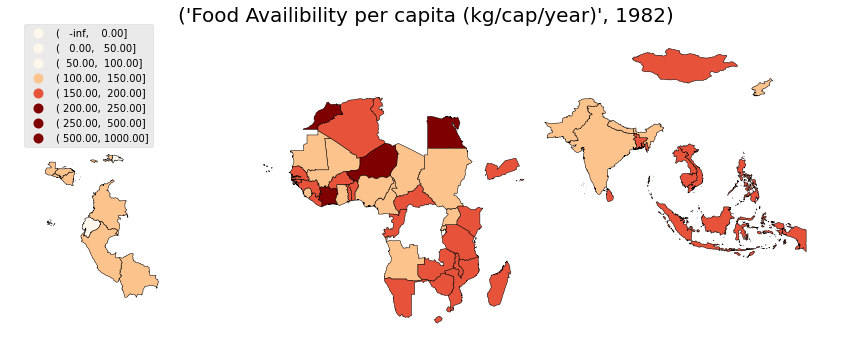

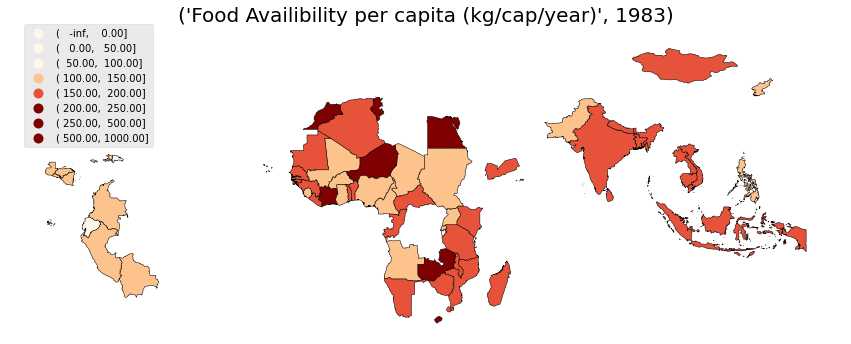

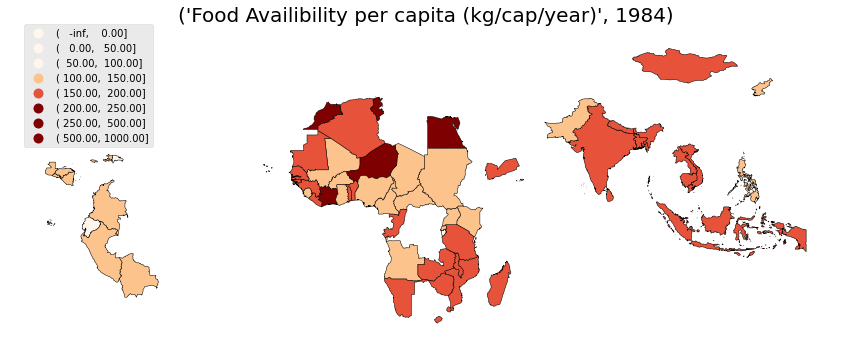

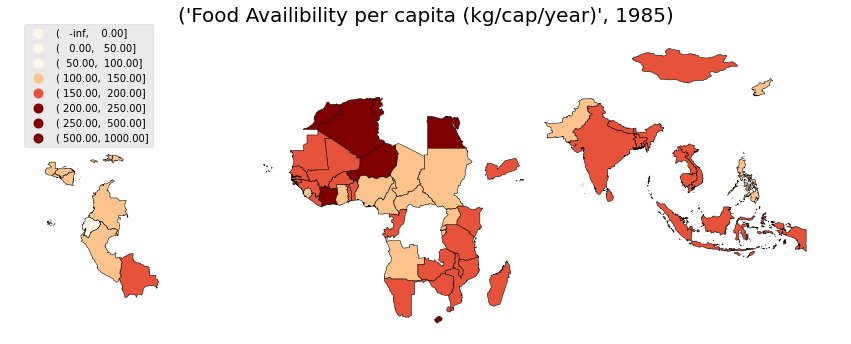

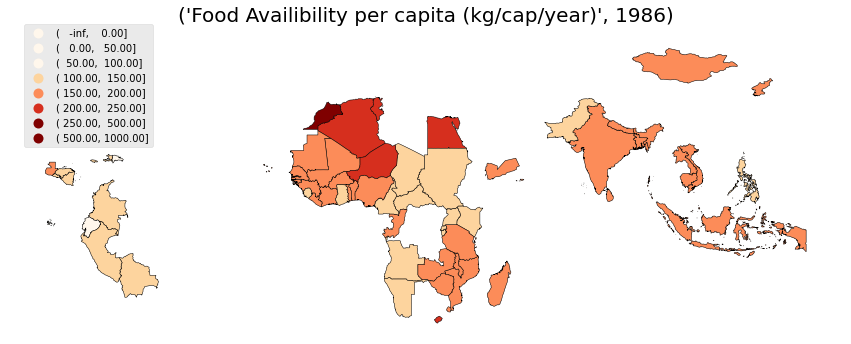

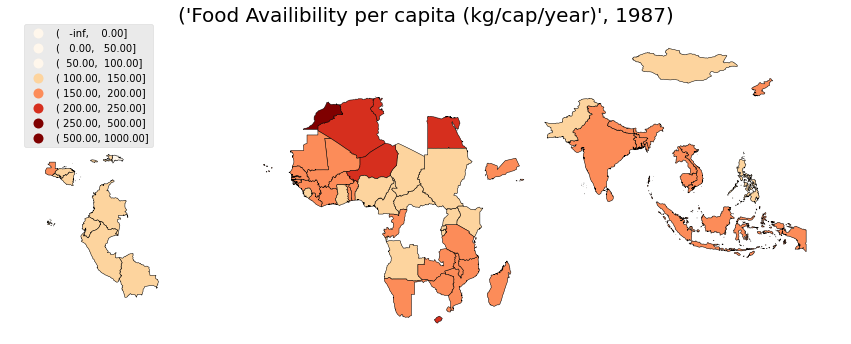

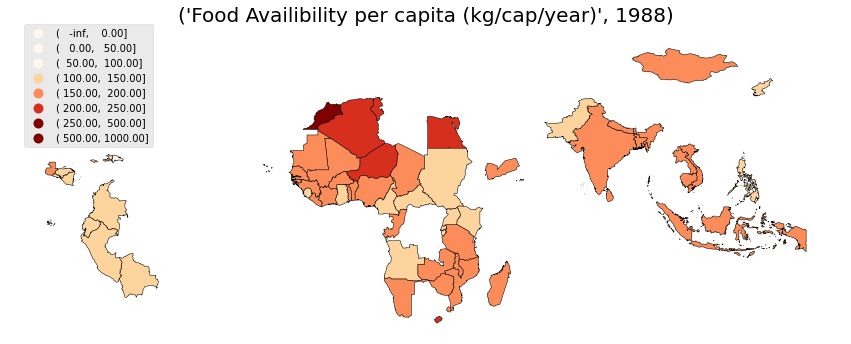

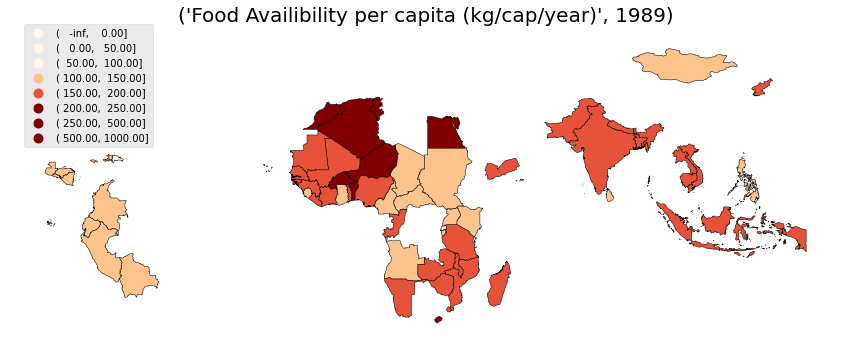

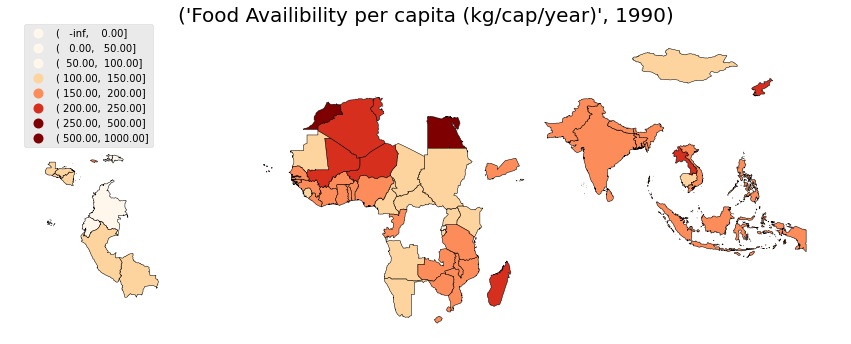

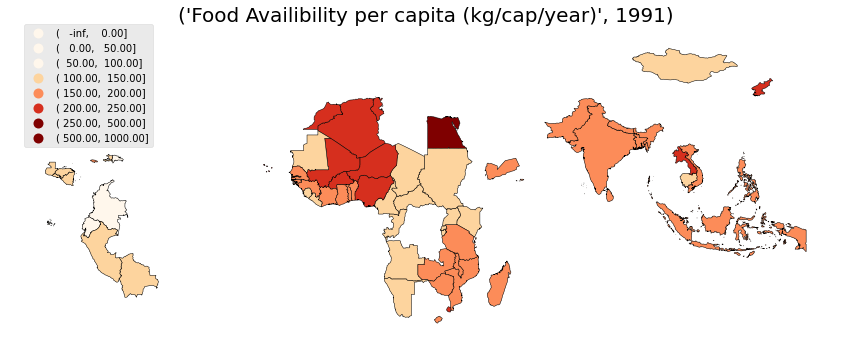

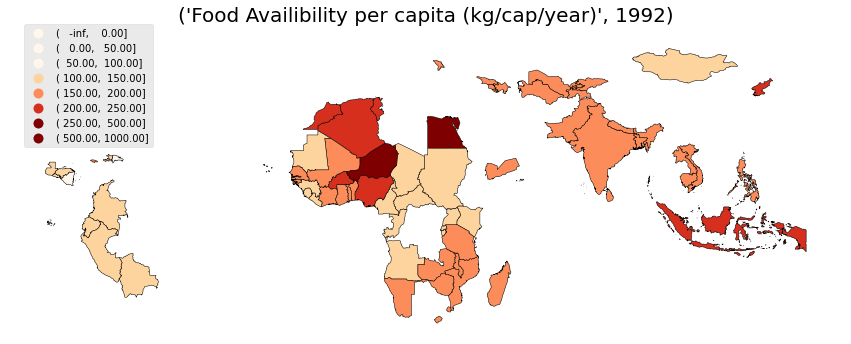

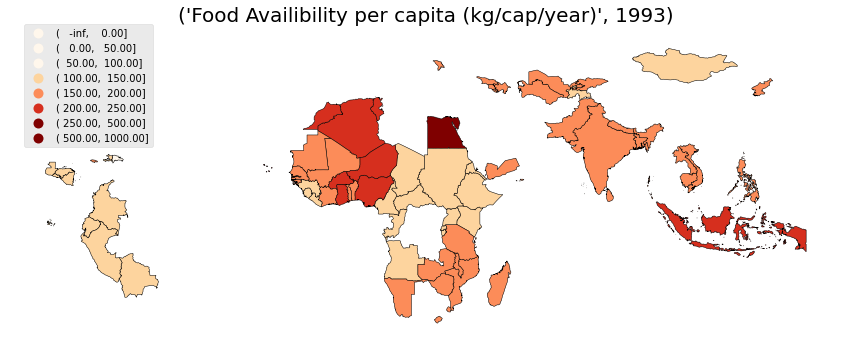

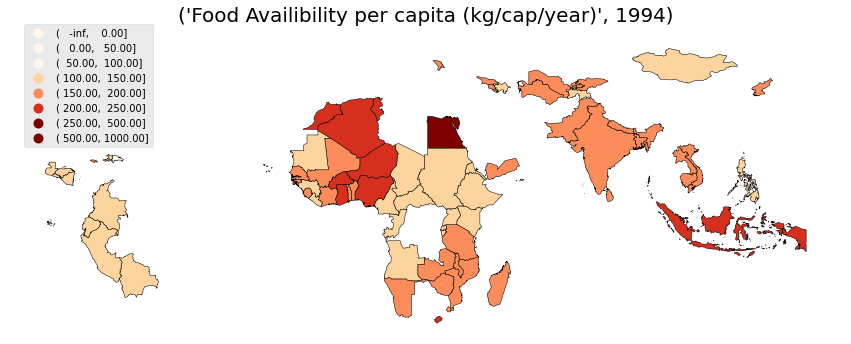

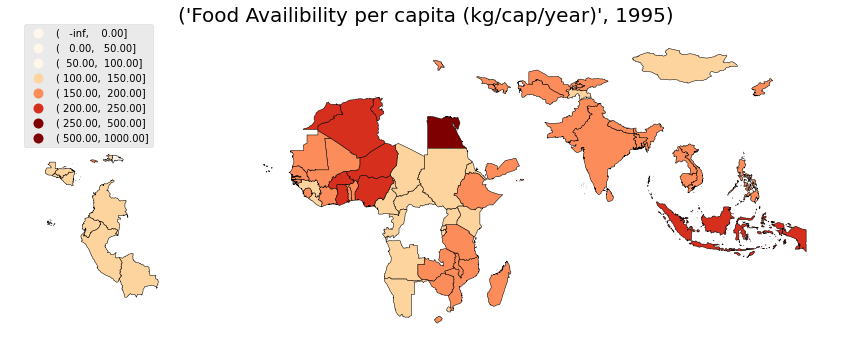

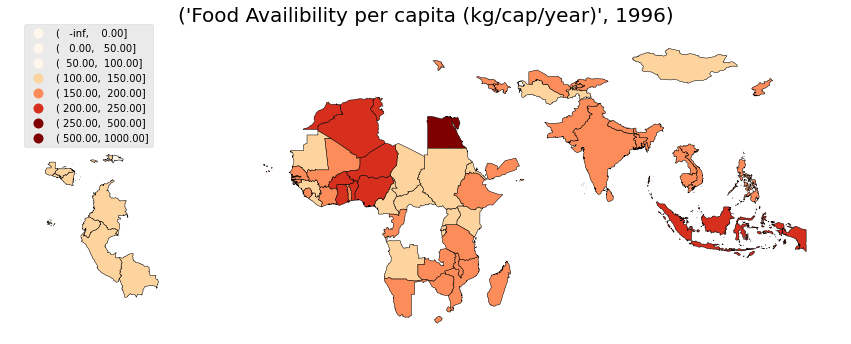

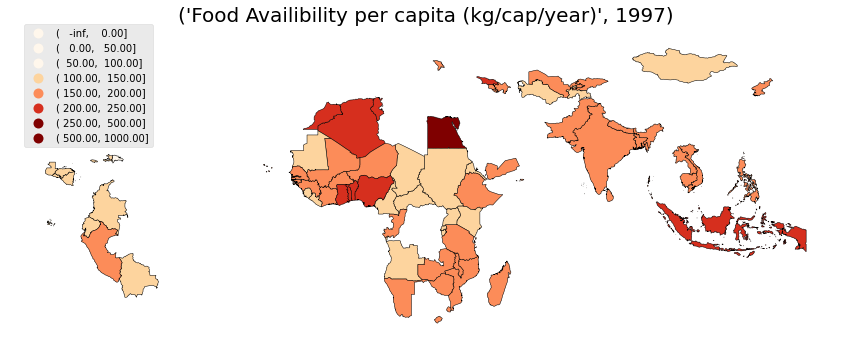

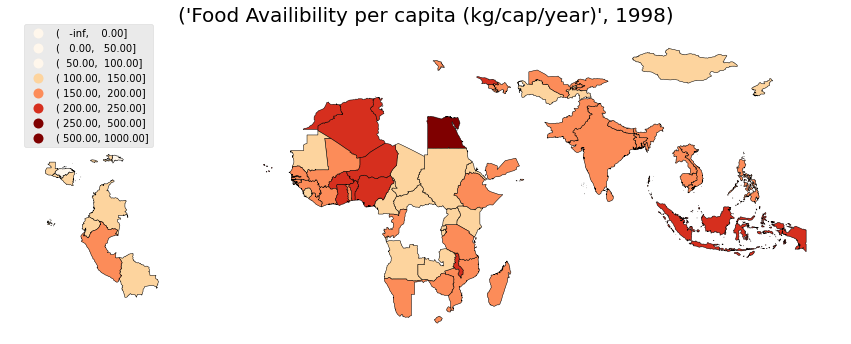

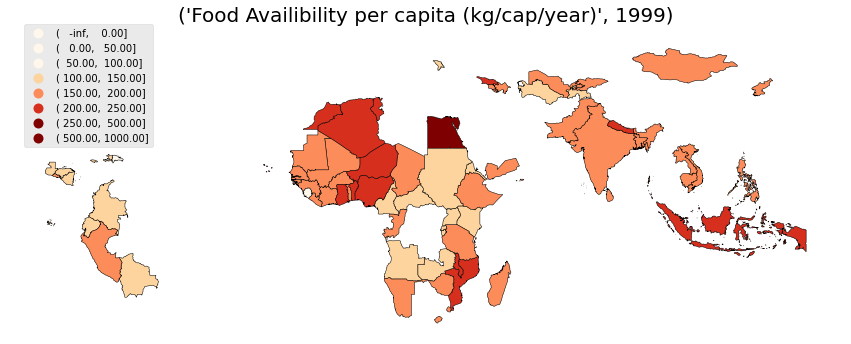

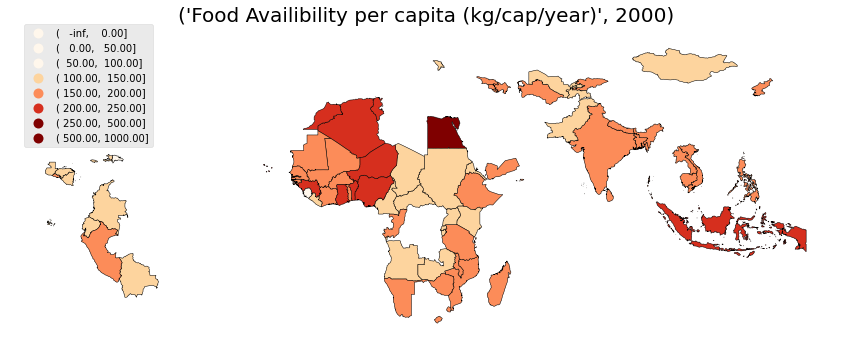

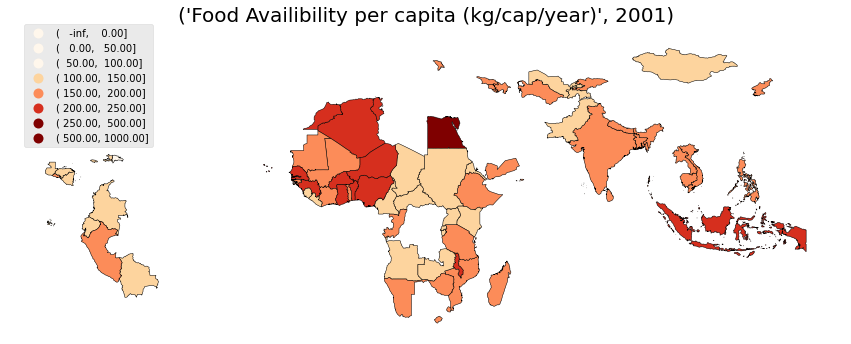

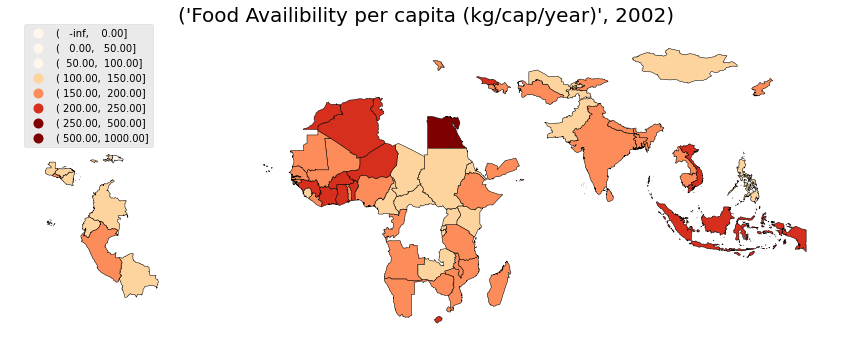

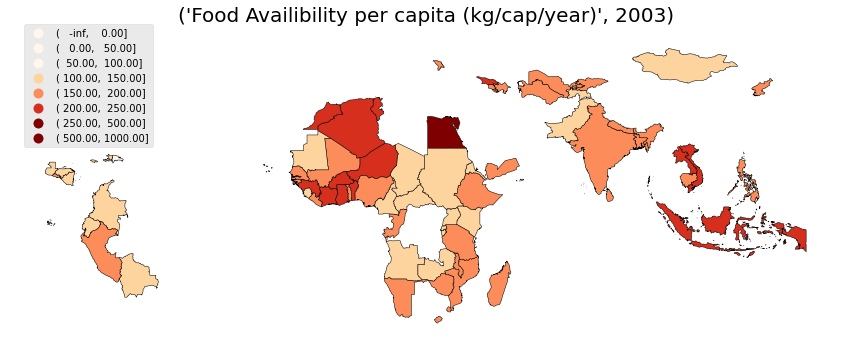

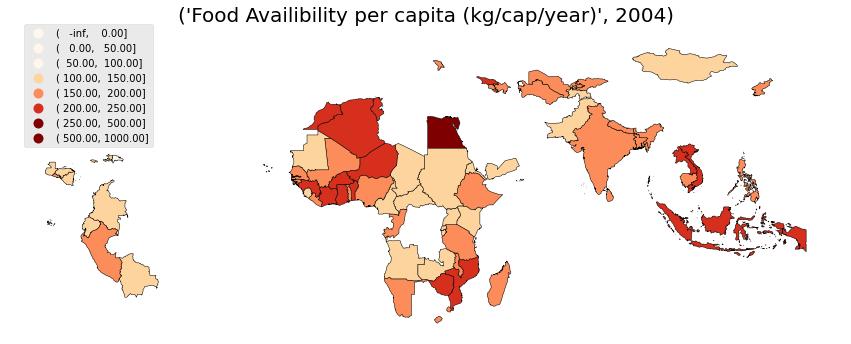

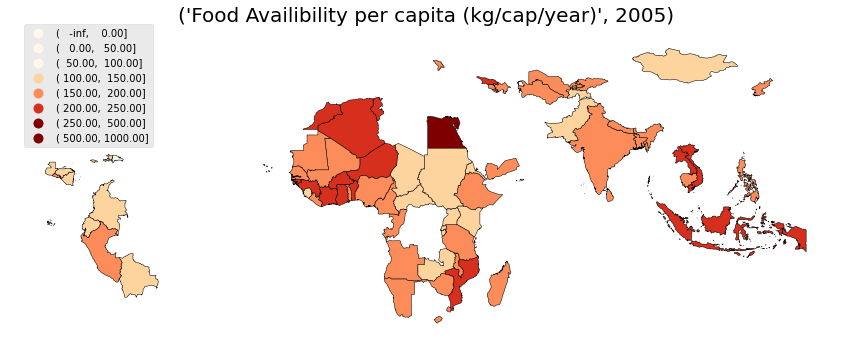

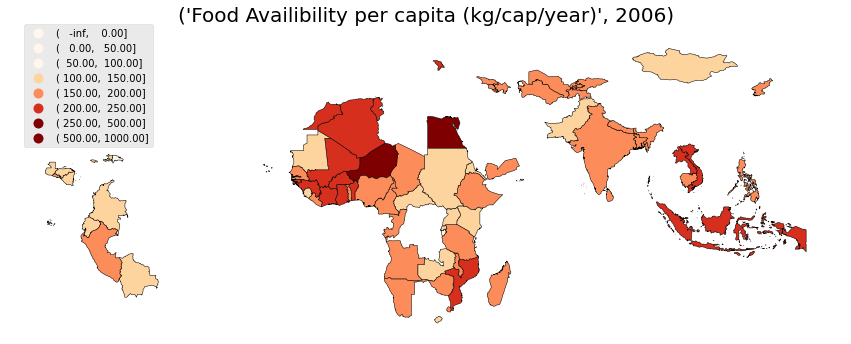

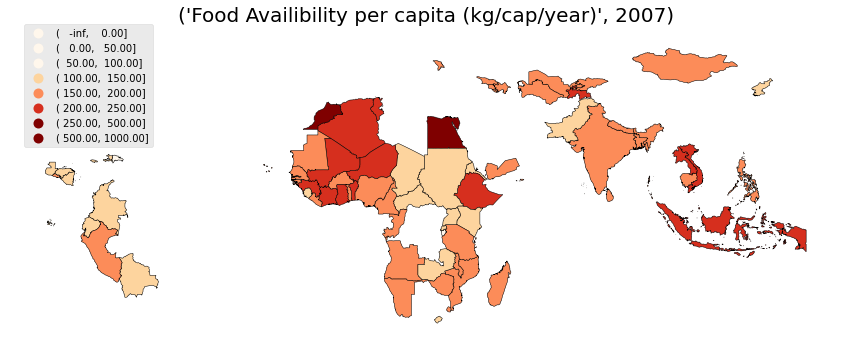

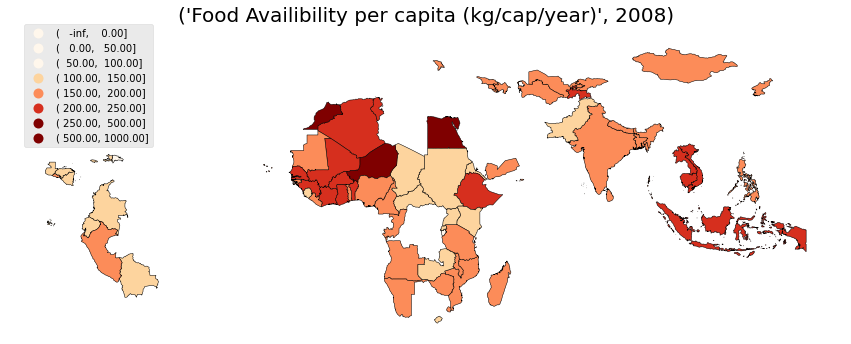

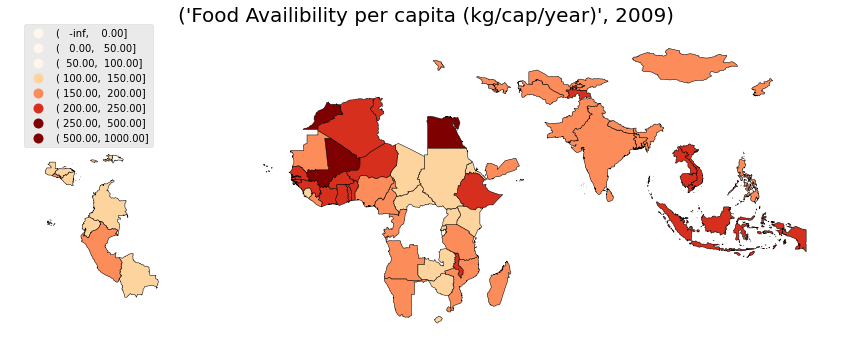

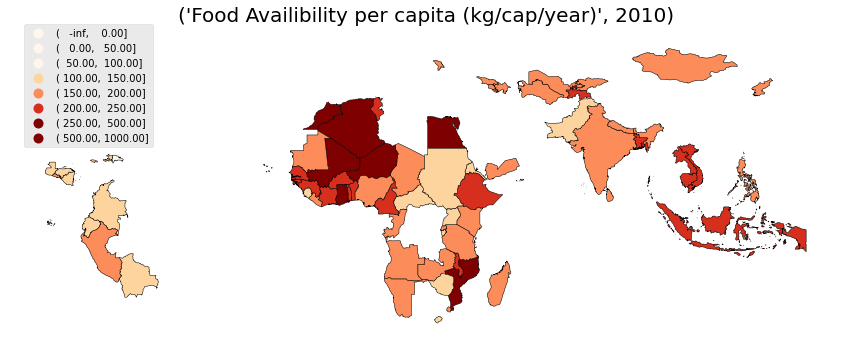

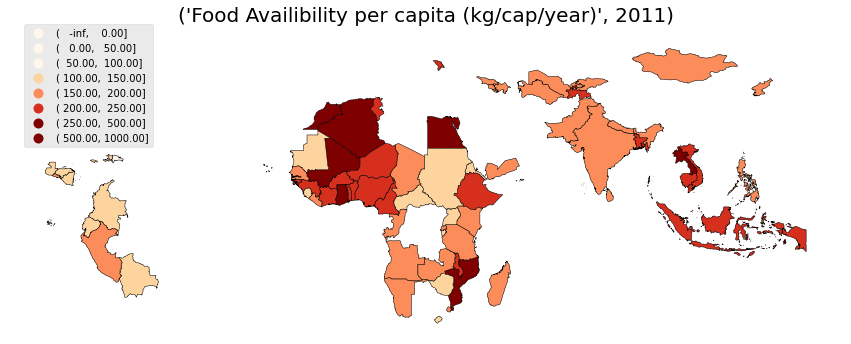

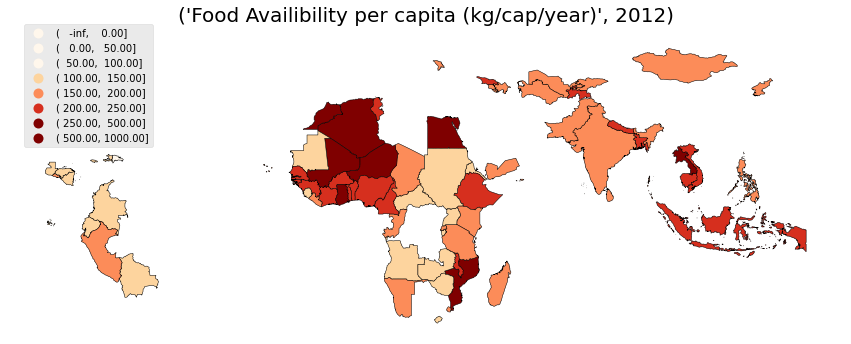

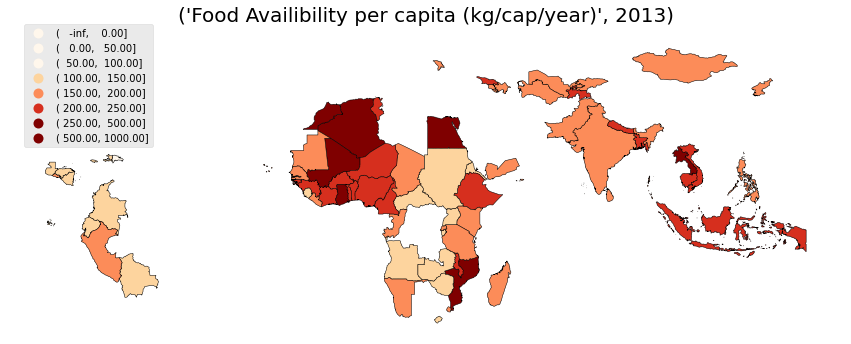

In [13]:
#using a for loop, create maps for every year and store them in a gif file.

merged = world_map.join(data, on = 'NAME', how = 'right')
images = []
for dates in merged.columns.to_list()[2:36]:
  ax = merged.plot(column = dates,
                   cmap ='OrRd',
                   figsize = (15,15),
                   legend = True,
                   scheme = 'user_defined',
                   classification_kwds = {'bins':[0,50,100,150,200,250,500,1000]}, 
                   edgecolor = 'black', 
                   linewidth = 0.5)

  ax.set_title(dates, fontdict =
             {'fontsize':20}, pad = 12.5)
  
  ax.set_axis_off()
  ax.get_legend().set_bbox_to_anchor((0.18, 1.05))

  img = ax.get_figure()

  variable = io.BytesIO()
  img.savefig(variable, format = 'png', bbox_inches = 'tight')
  variable.seek(0)
  images.append(PIL.Image.open(variable))

images[0].save('Dynamic_map.gif', format = 'GIF',
               append_images = images[1:],
               save_all = True, duration = 300,
               loop = 0)

variable.close()

Then go back to the content folder, the Dynamic Map.gif should be there.
